# SET DE DATOS

Debido a que los datos recolectados de las estaciones de Alemania, implicaban promedios diarios. para efectos de utilizacón del modelo de red neuronal LSMT, se opta por cambiarlos por datos driaros de una estación del SIATA (Sistema de alerta temprana del Valle de Aburra).  
 
Para este caso se procede a mirar varias de las estaciones y su parametro de calidad de adquicisón , optando por la estación 202 AMVA (Área metropolitana del Valle de Aburrá). 

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os

In [3]:
def procesadoData(carpeta=None):
    siata = os.listdir(carpeta)
    for i in siata:
        s_df= pd.read_csv(f"{carpeta}/{i}",index_col=0)
        s_df.index = pd.to_datetime(s_df.index)
        s_df.Temperatura.replace('',np.nan,inplace=True)
        s_df.Temperatura.replace(-999.0,np.nan,inplace=True)
        s_df.Temperatura.replace(0.0,np.nan,inplace=True)
        # s_df.Temperatura.isna().sum()
        s_df.interpolate(method='time',inplace=True)
        s_df=s_df.resample('H').mean()  
        s_df.to_csv(f"{carpeta}PP/{i}")

In [ ]:
procesadoData('EST202')

In [10]:
carpeta = "EST202PP"
siata = os.listdir(carpeta)
total = pd.DataFrame()
for i in siata:
    s_df= pd.read_csv(f"{carpeta}/{i}",index_col=0)
    s_df.index = pd.to_datetime(s_df.index)
    total=pd.concat([total,s_df])
    
total.to_csv("TemperaturaEst202_2013_2022.csv")
    

<Axes: xlabel='fecha_hora'>

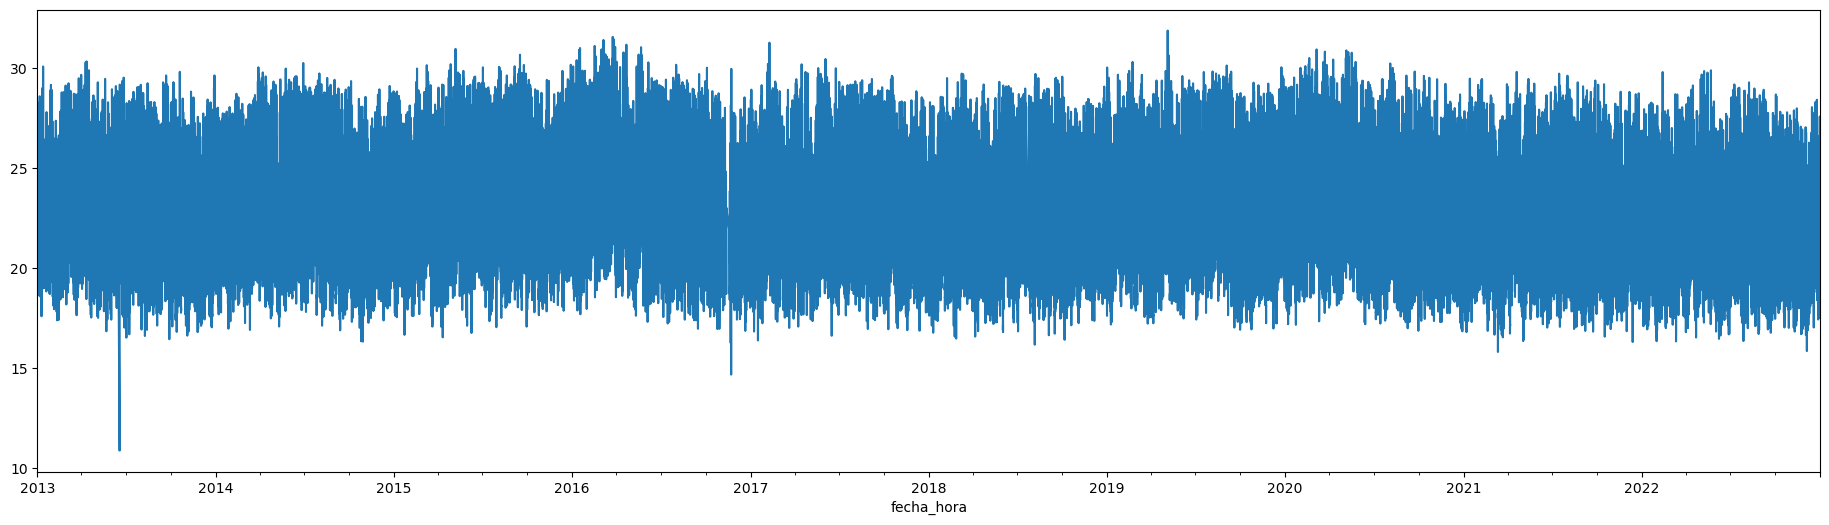

In [44]:
# t_df= pd.read_csv("TemperaturaEst202_2013_2022.csv",index_col=0)
# t_df.index = pd.to_datetime(t_df.index)
t_df.Temperatura.plot(figsize=(23,6))

In [43]:
t_df.interpolate(method='time',inplace=True)
t_df.isna().sum()

Temperatura    0
Calidad        0
dtype: int64

In [4]:
def graficaSerie(carpeta=None,r1=0,r2=10):
    siata = os.listdir(carpeta) # Archivos ya preprocesados
    for i in range(r1,r2):
        s_df= pd.read_csv(f"{carpeta}/{siata[i]}",index_col=0)
        s_df.index = pd.to_datetime(s_df.index)
        s_df.Temperatura.plot(figsize=(23,6))
    plt.title(f"{carpeta}")
    plt.show()

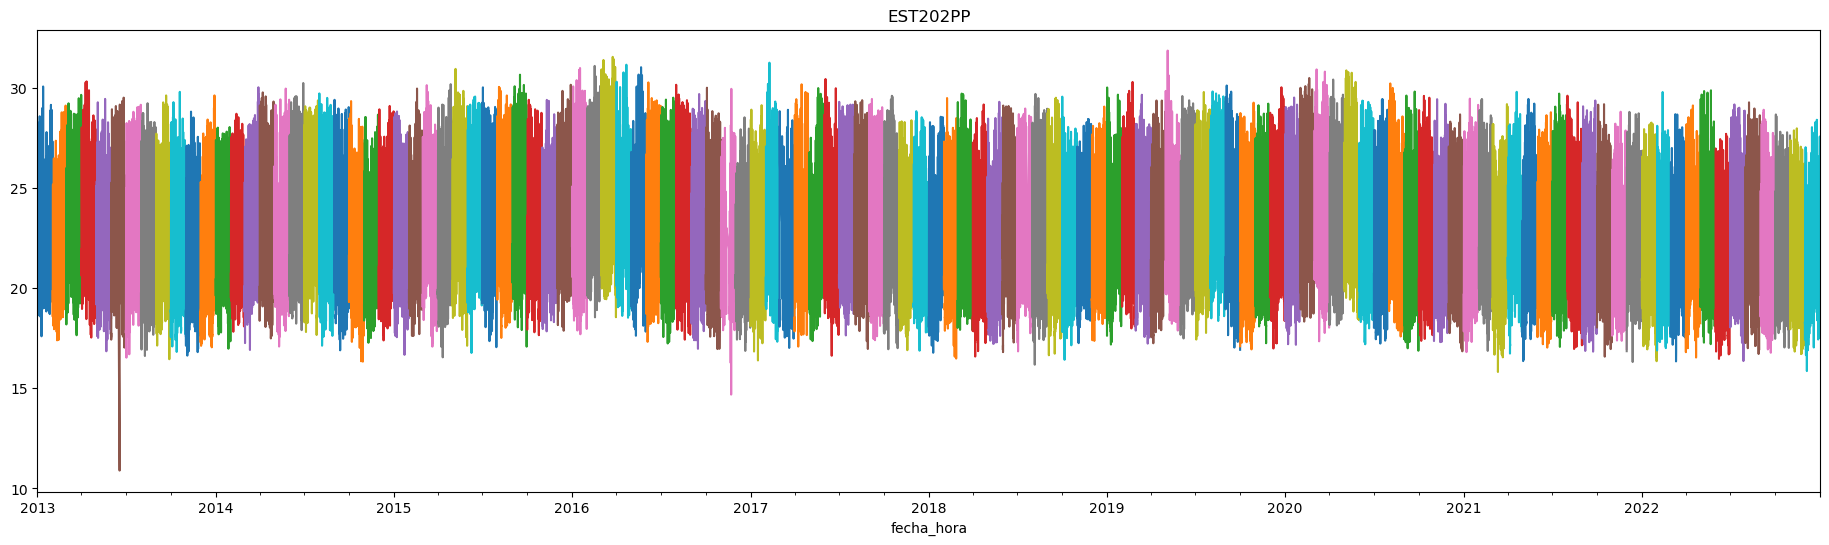

In [6]:
graficaSerie("EST202PP",0,120)

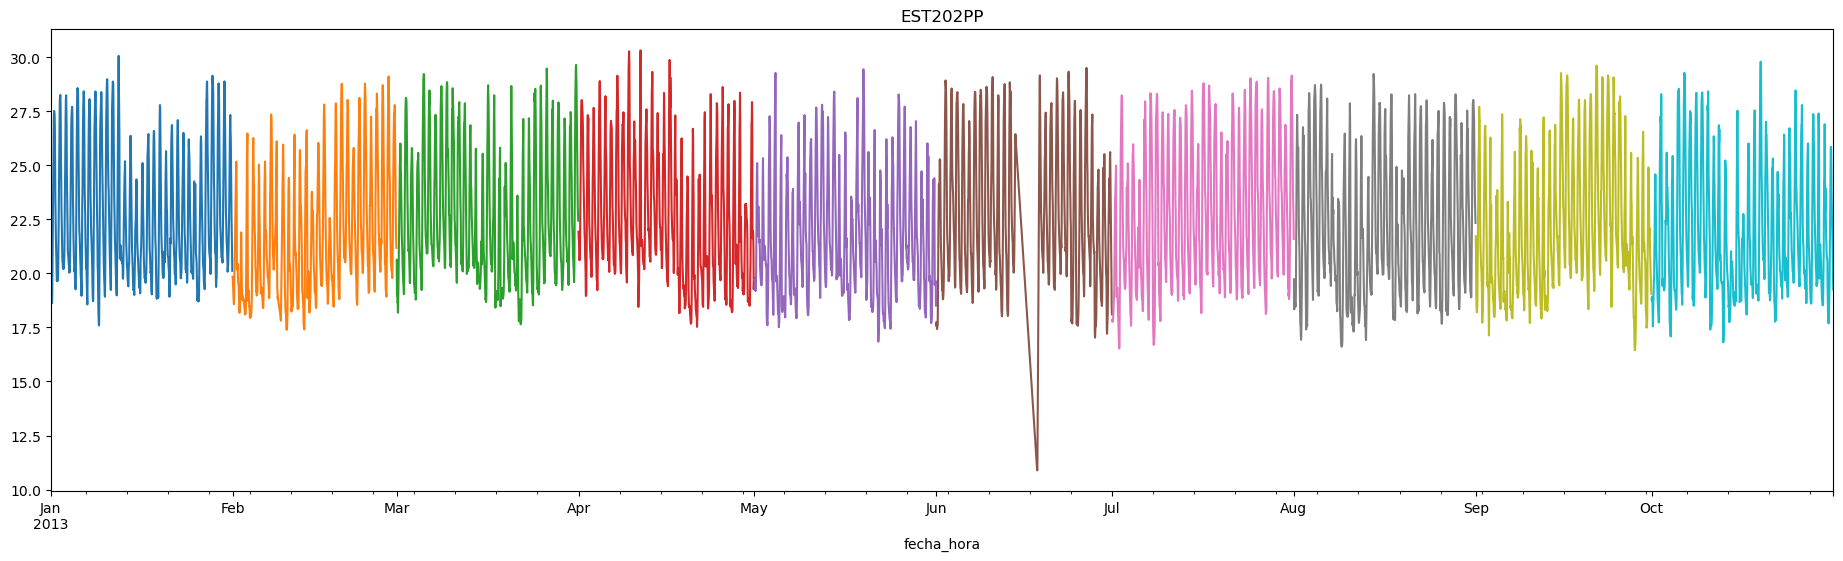

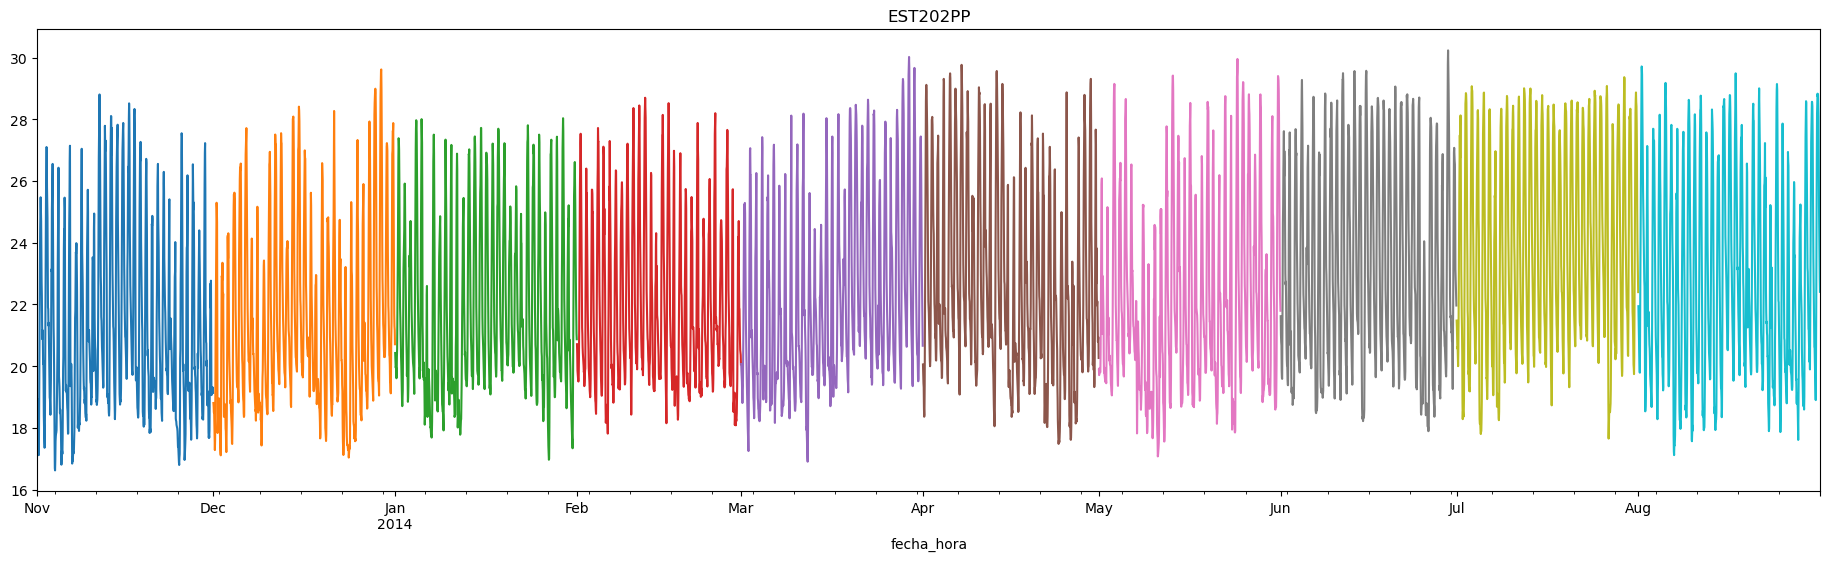

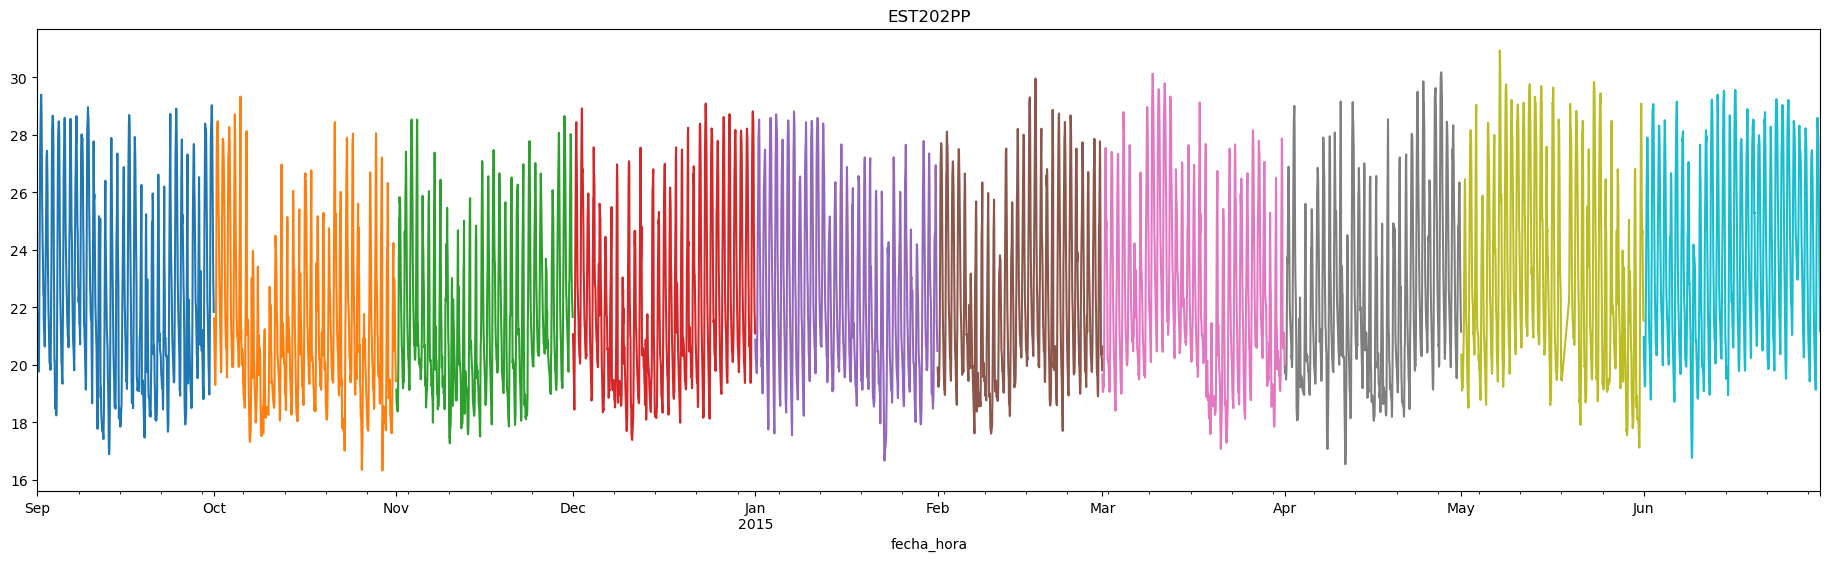

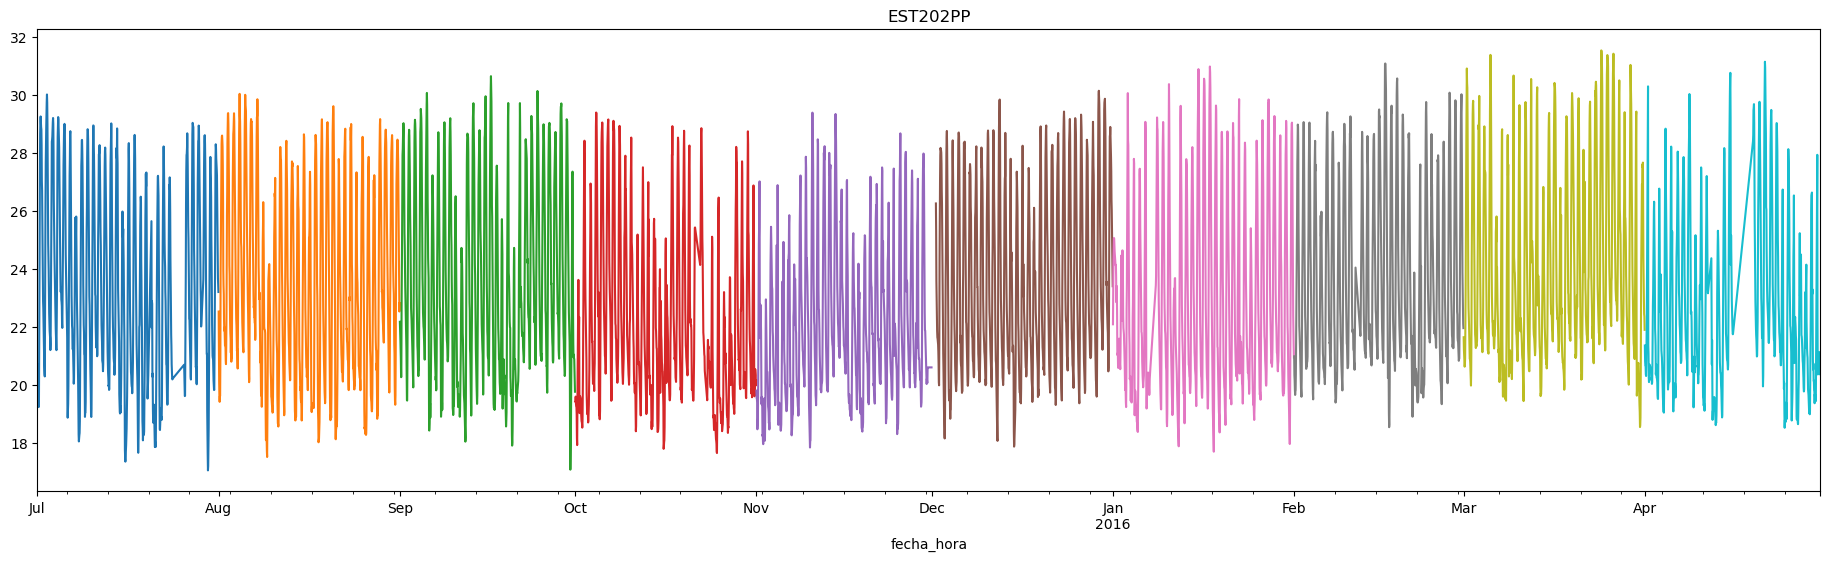

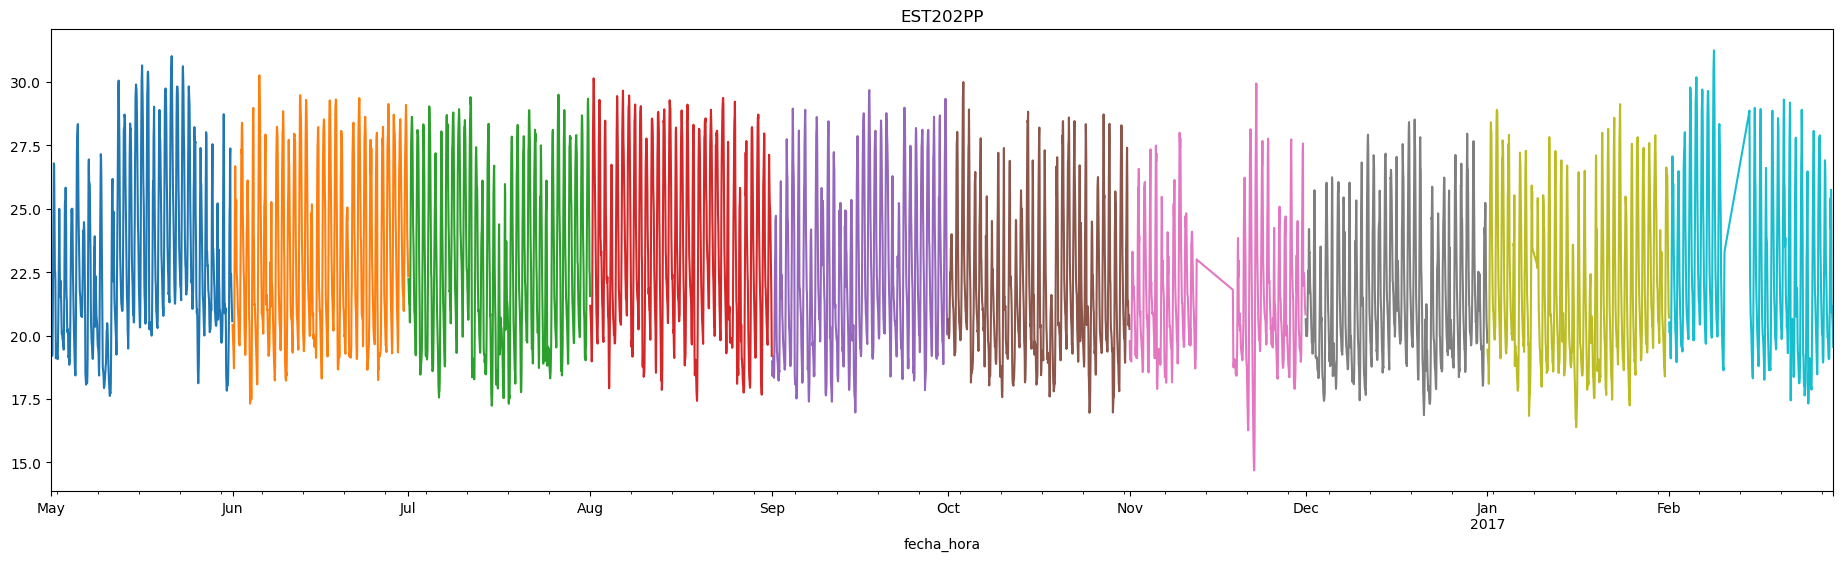

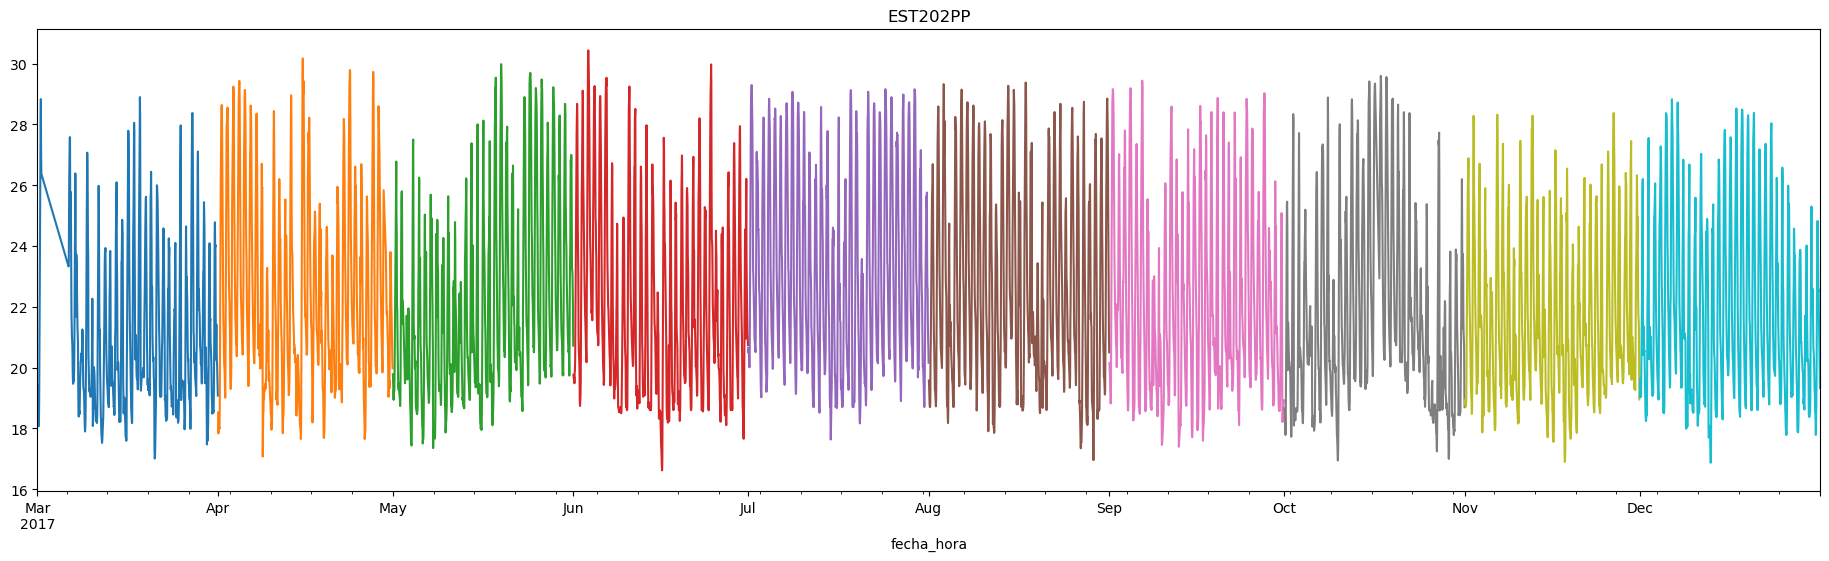

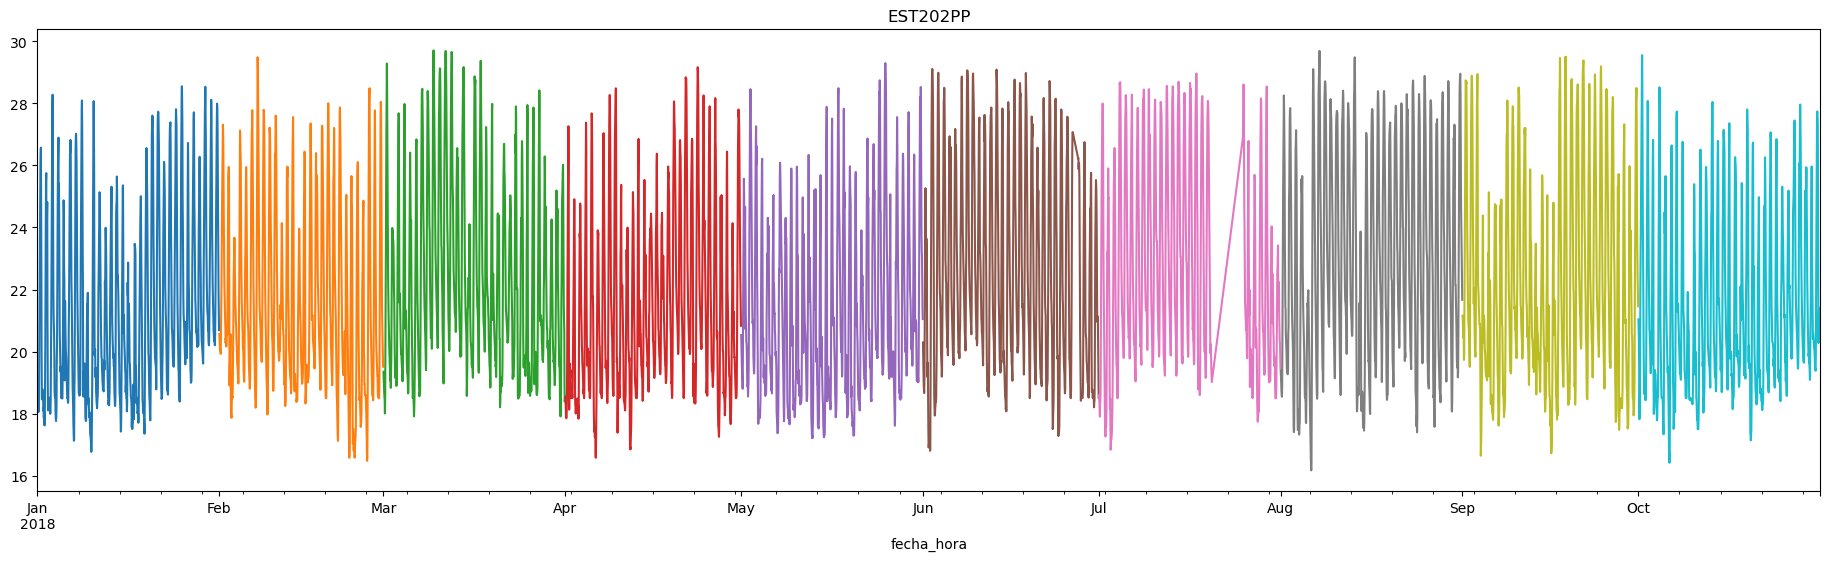

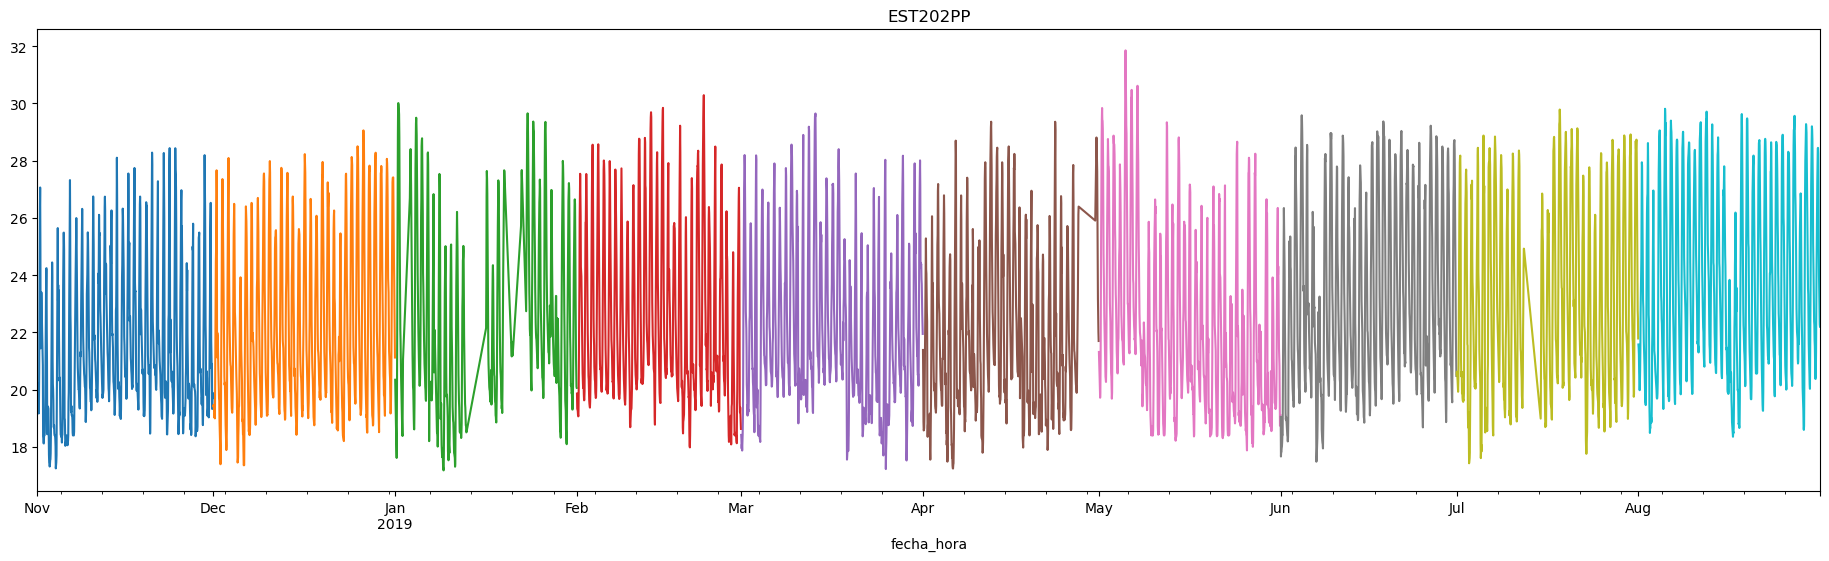

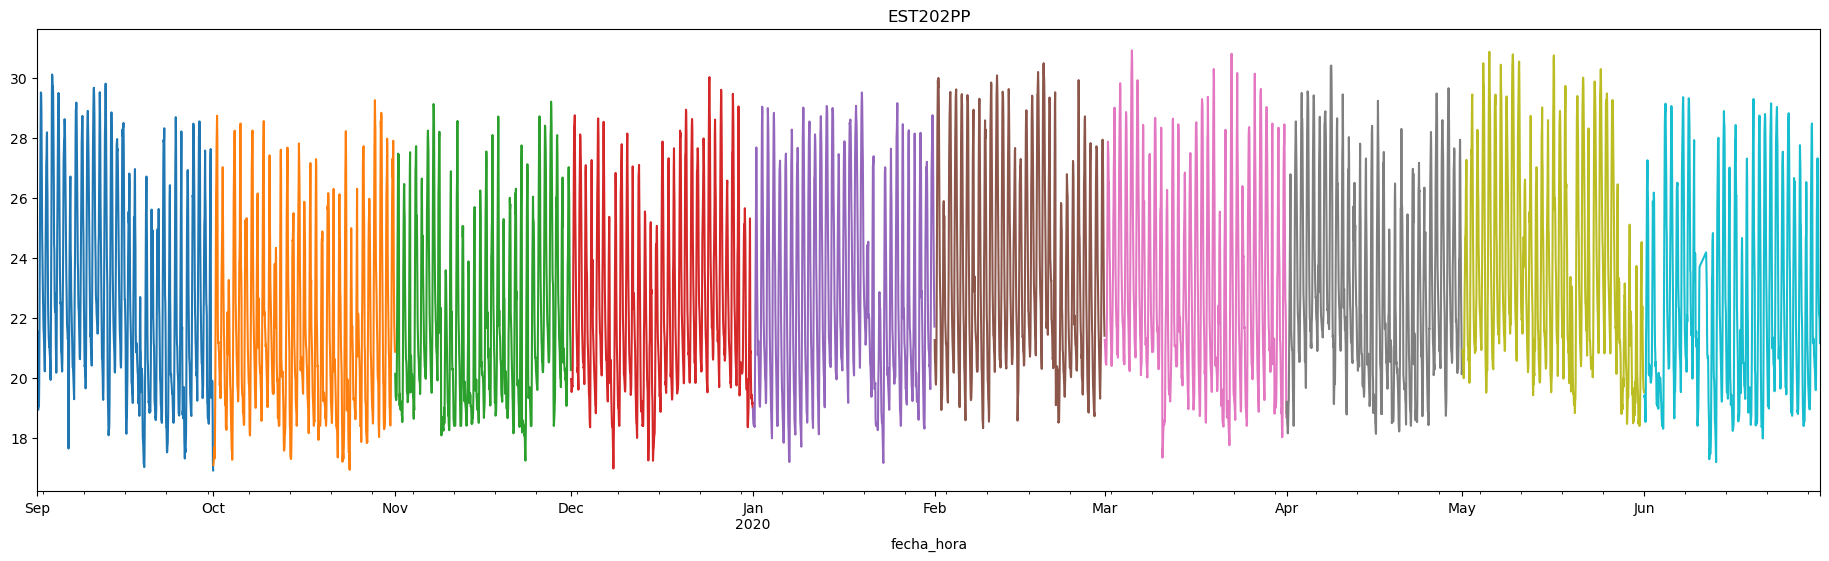

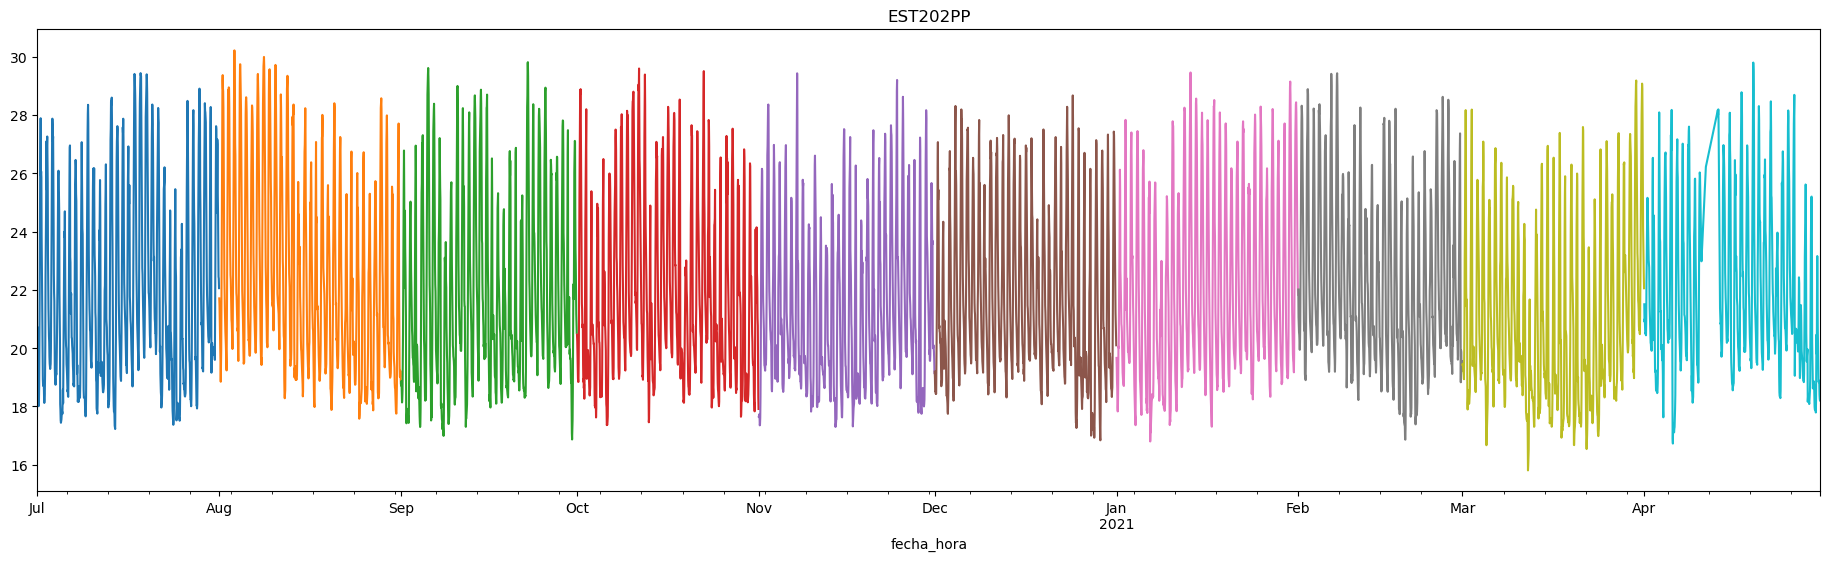

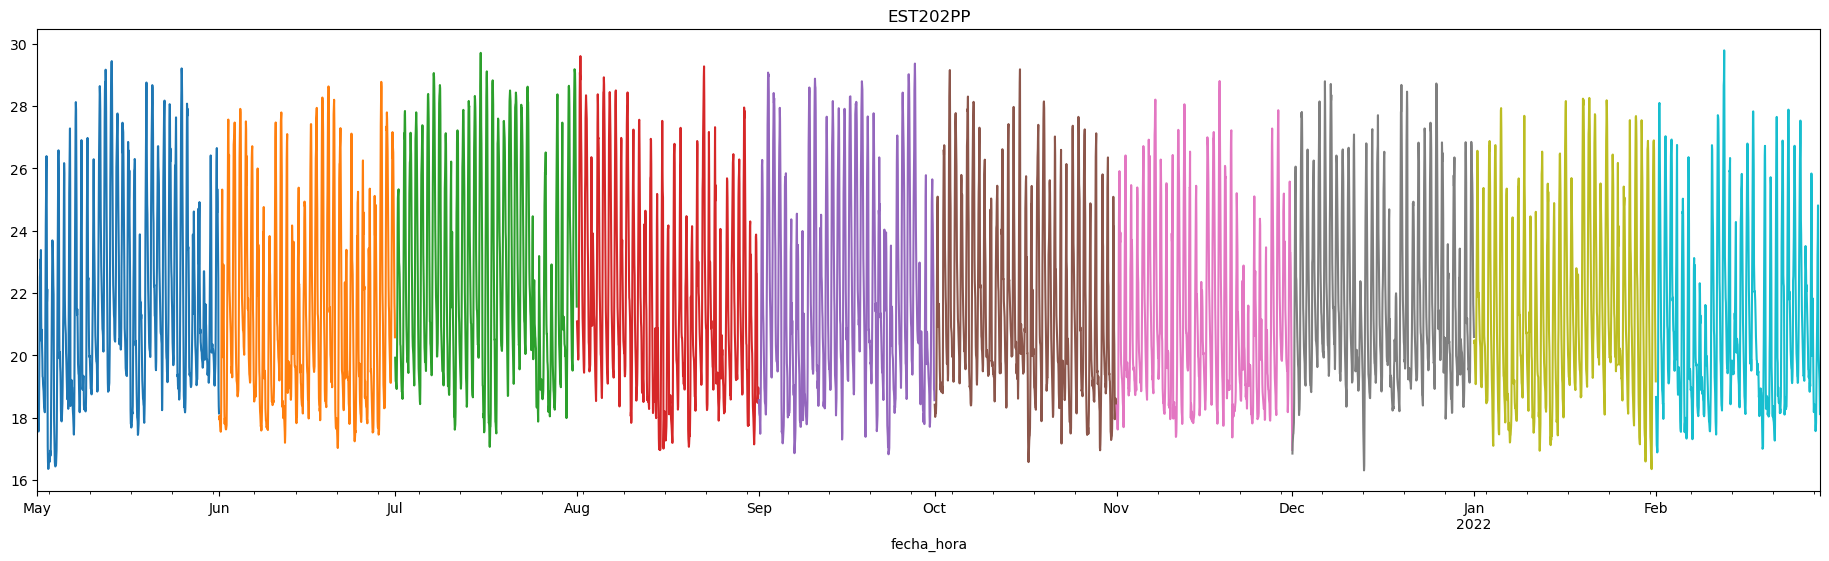

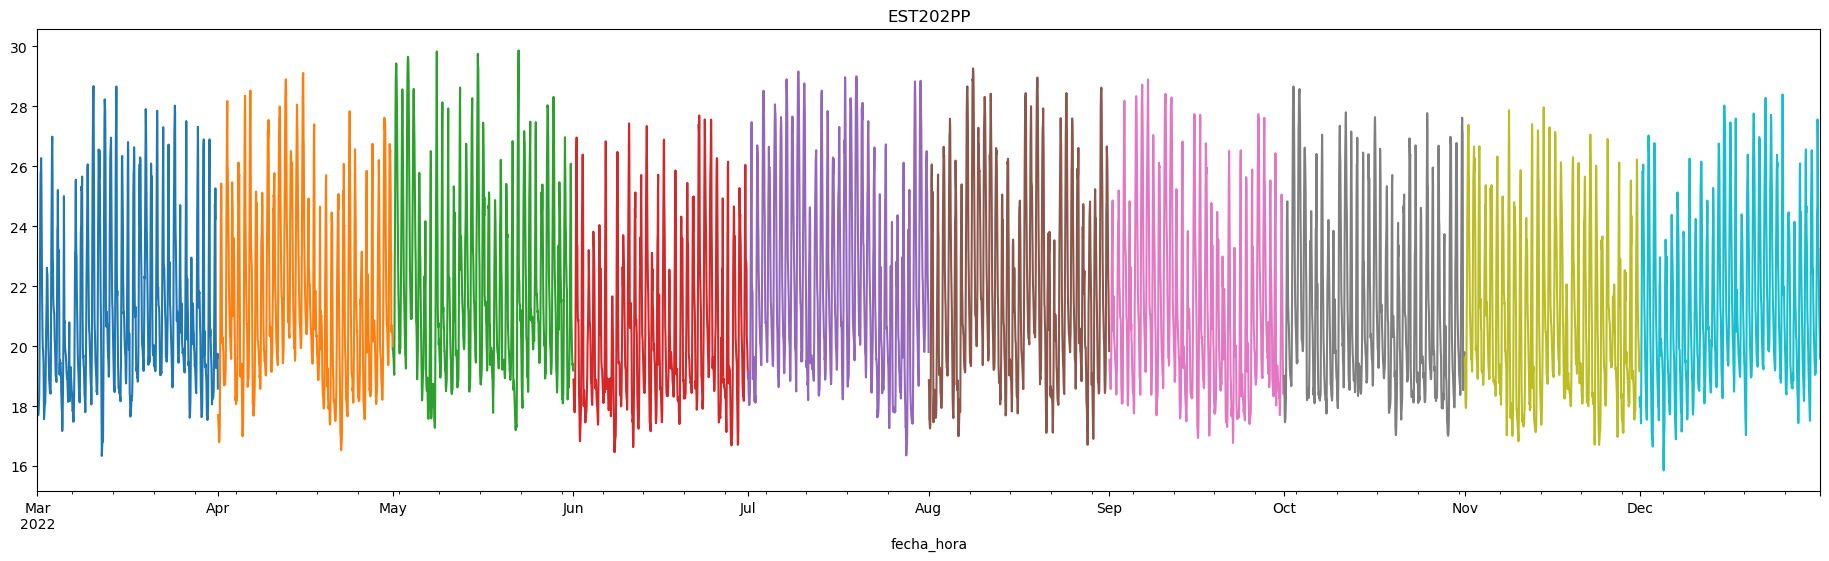

In [5]:
graficaSerie("EST202PP",0,10)
graficaSerie("EST202PP",10,20)
graficaSerie("EST202PP",20,30)
graficaSerie("EST202PP",30,40)
graficaSerie("EST202PP",40,50)
graficaSerie("EST202PP",50,60)
graficaSerie("EST202PP",60,70)
graficaSerie("EST202PP",70,80)
graficaSerie("EST202PP",80,90)
graficaSerie("EST202PP",90,100)
graficaSerie("EST202PP",100,110)
graficaSerie("EST202PP",110,120)

Durante la exploración inicial de los datos, estos estos fueron recolectados cada minuto, adicionalemente se hallaron datos faltatantes que colocaban como -999 , otros en cero y otros ausentes , se procede a realizar un remuestreo y se realiza un promedio de los datos cada hora , se ota por una iterpoalción para los datos faltantes y en cero. Con esto se plotean y se obtienen los gráficos.

In [45]:
# t_df= pd.read_csv("TemperaturaEst202_2013_2022.csv",index_col=0)
t_df.describe()

Temperatura       Calidad
count  87648.000000  87648.000000
mean      22.233514      9.387628
std        3.129681     80.525298
min       10.887235      1.000000
25%       19.725000      1.000000
50%       21.466667      1.000000
75%       24.543333      1.000000
max       31.851667   4149.016667

<Axes: xlabel='Temperatura', ylabel='Count'>

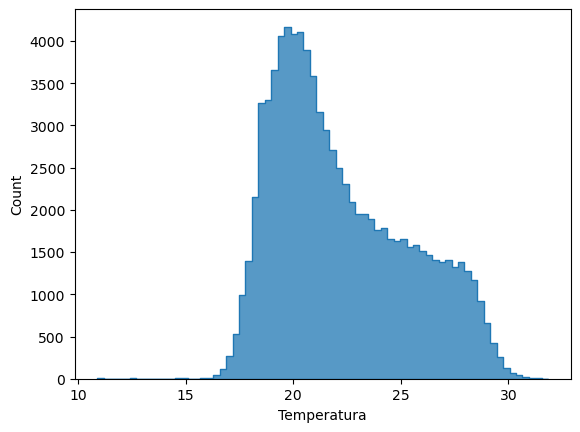

In [46]:
sb.histplot(t_df.Temperatura, bins=70, element='step')


c:\Users\Yesid\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


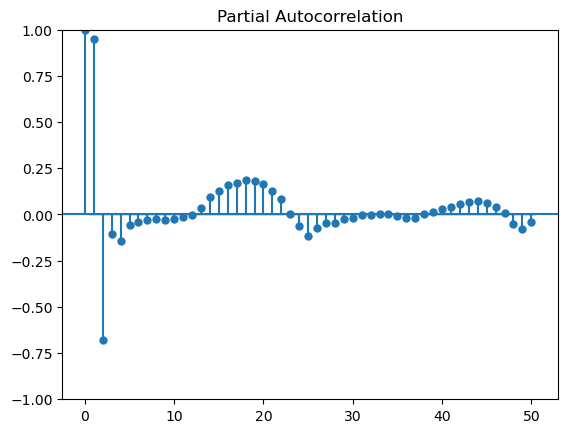

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(t_df.loc[:,['Temperatura']], lags=50)
plt.show()

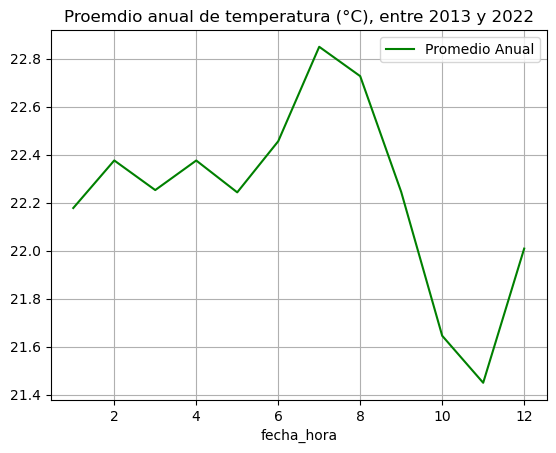

In [48]:
t_df.Temperatura.groupby(t_df.index.month).mean().plot(label="Promedio Anual",title="Proemdio anual de temperatura (°C), entre 2013 y 2022",color="g")
plt.legend()
plt.grid()
plt.show()